### Lib

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


2023-05-13 08:40:12.470464: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-13 08:40:12.570792: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-13 08:40:12.572207: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-13 08:40:14.225560: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### LOAD DATA

In [2]:
dataset = pd.read_csv('Dataset.txt')

In [3]:
print(dataset.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

In [4]:
print(dataset.shape)

(125973, 43)


In [5]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [6]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### CLEAINGING DATASET

In [7]:
dataset = dataset.drop_duplicates()
print(dataset)

        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0      

### MISSING VALUES

In [8]:
dataset.fillna(0, inplace=True)

In [9]:
print(dataset.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### OUTLIER

In [10]:
print(dataset.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_category', 'occurance'],
      dtype='object')


In [11]:
print(dataset['attack_category'].value_counts())

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack_category, dtype: int64


In [12]:
print(dataset['protocol_type'].value_counts())

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64


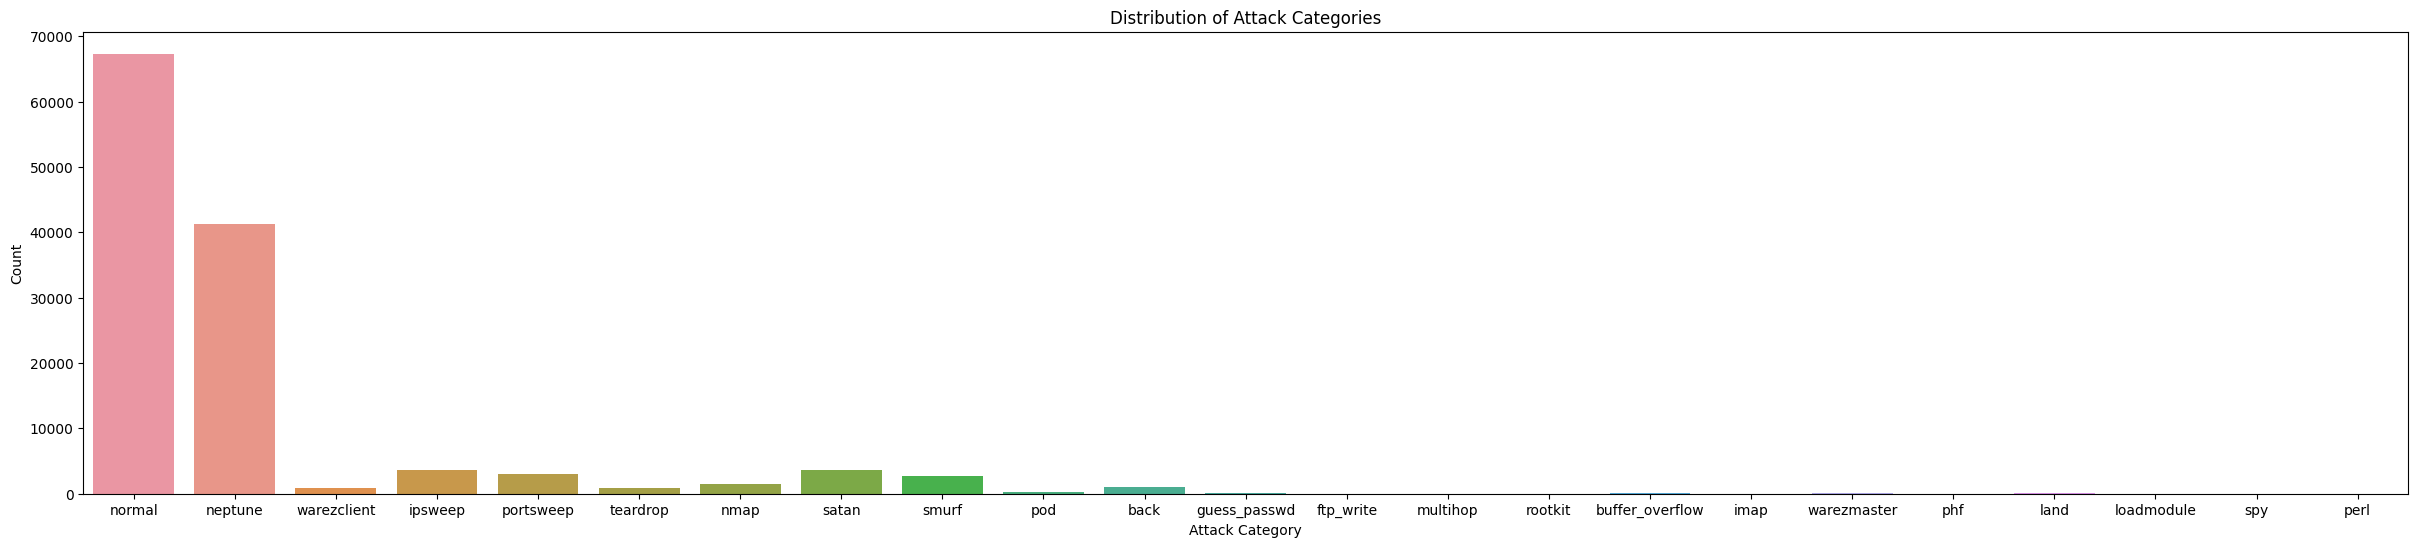

In [13]:
plt.figure(figsize=(30, 6))
sns.countplot(x='attack_category', data=dataset)
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Distribution of Attack Categories')
plt.show()

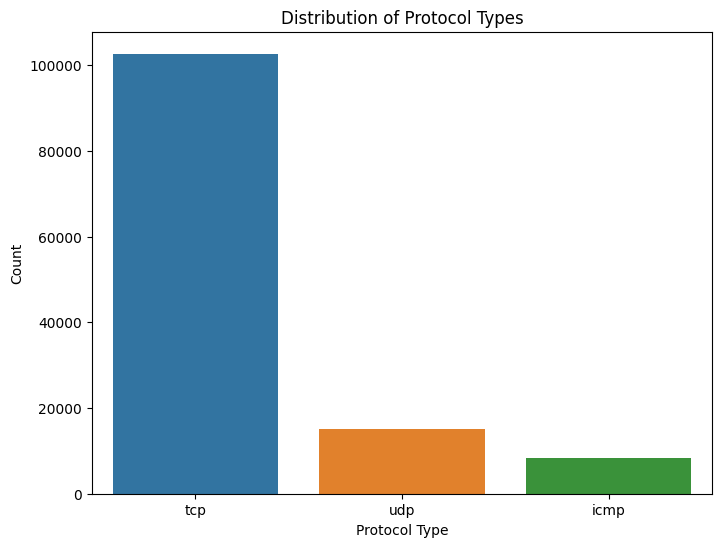

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='protocol_type', data=dataset)
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Distribution of Protocol Types')
plt.show()

In [15]:
obj = dataset.describe(include='object')
print(obj)

       protocol_type service    flag attack_category
count         125973  125973  125973          125973
unique             3      70      11              23
top              tcp    http      SF          normal
freq          102689   40338   74945           67343


In [16]:
obj = obj.drop(['top'], axis=0)
print(obj)

       protocol_type service    flag attack_category
count         125973  125973  125973          125973
unique             3      70      11              23
freq          102689   40338   74945           67343


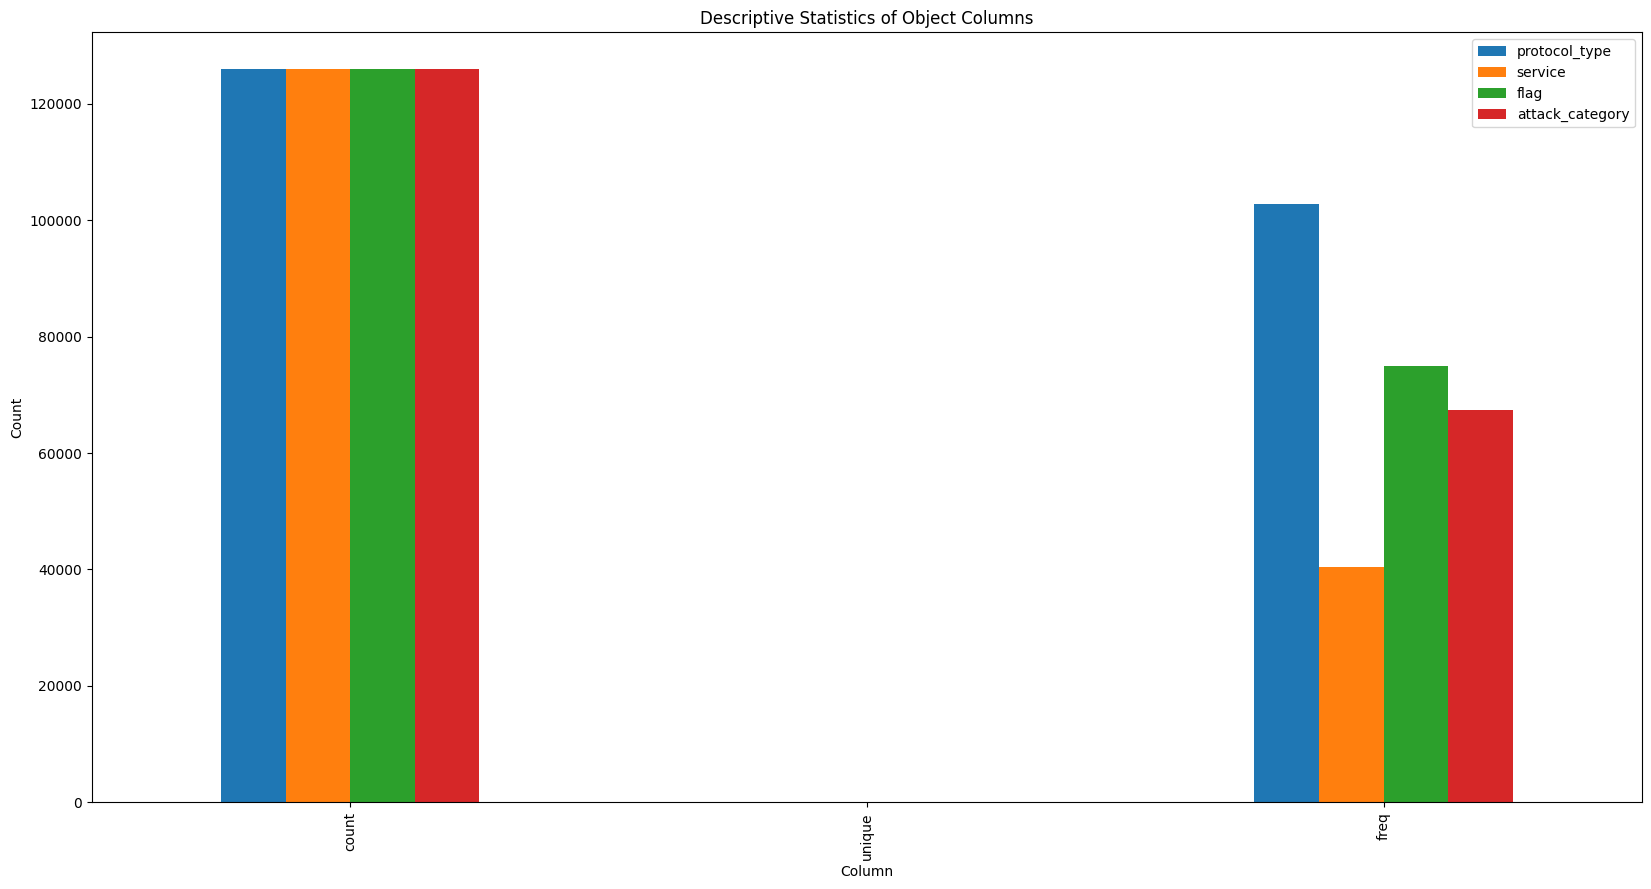

In [17]:
obj.plot(kind='bar', figsize=(20, 10))
plt.xlabel('Column')
plt.ylabel('Count')
plt.title('Descriptive Statistics of Object Columns')
plt.show()


### ATTACKING FILE 

In [18]:
data = pd.read_csv("Attack_types.txt")

In [19]:
print(data)

   attack_category attack_type
0                  apache2 dos
1                     back dos
2                 mailbomb dos
3             processtable dos
4            snmpgetattack dos
5                 teardrop dos
6                    smurf dos
7                     land dos
8                  neptune dos
9                      pod dos
10                udpstorm dos
11                      ps u2r
12         buffer_overflow u2r
13                    perl u2r
14                 rootkit u2r
15              loadmodule u2r
16                   xterm u2r
17               sqlattack u2r
18              httptunnel u2r
19               ftp_write r2l
20            guess_passwd r2l
21               snmpguess r2l
22                    imap r2l
23                     spy r2l
24             warezclient r2l
25             warezmaster r2l
26                multihop r2l
27                     phf r2l
28                    imap r2l
29                   named r2l
30                sendmail r2l
31      

In [20]:
data.shape

(42, 1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   attack_category attack_type  42 non-null     object
dtypes: object(1)
memory usage: 464.0+ bytes


In [22]:
data[['attack_category', 'attack_type']] = data['attack_category attack_type'].str.split(' ', 1, expand=True)
data.drop(columns=['attack_category attack_type'], inplace=True)

/tmp/ipykernel_5533/1677524273.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['attack_category', 'attack_type']] = data['attack_category attack_type'].str.split(' ', 1, expand=True)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   attack_category  42 non-null     object
 1   attack_type      42 non-null     object
dtypes: object(2)
memory usage: 800.0+ bytes


In [24]:
data['attack_type'].value_counts()

r2l       15
dos       11
u2r        8
probe      7
normal     1
Name: attack_type, dtype: int64

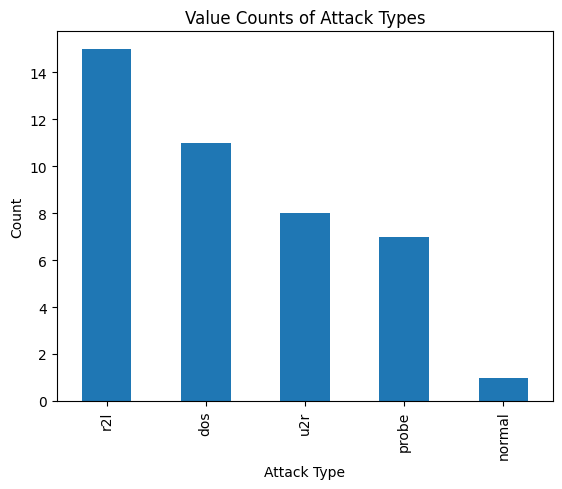

In [25]:
data['attack_type'].value_counts().plot(kind='bar')
plt.title('Value Counts of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

### correlation analysis

In [26]:
attack_mapping = dict(zip(data['attack_category'], data['attack_type']))

In [27]:
dataset['attack_type'] = dataset['attack_category'].map(attack_mapping)
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,dos


In [28]:
dataset['attack_type'].value_counts()

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_type, dtype: int64

### Classification of Cyber Attacks Using Decision Tree Algorithm

In [29]:
data['attack_category']

0             apache2
1                back
2            mailbomb
3        processtable
4       snmpgetattack
5            teardrop
6               smurf
7                land
8             neptune
9                 pod
10           udpstorm
11                 ps
12    buffer_overflow
13               perl
14            rootkit
15         loadmodule
16              xterm
17          sqlattack
18         httptunnel
19          ftp_write
20       guess_passwd
21          snmpguess
22               imap
23                spy
24        warezclient
25        warezmaster
26           multihop
27                phf
28               imap
29              named
30           sendmail
31              xlock
32             xsnoop
33               worm
34               nmap
35            ipsweep
36          portsweep
37              satan
38              mscan
39              saint
40               worm
41             normal
Name: attack_category, dtype: object

In [30]:
data['attack_type']

0        dos
1        dos
2        dos
3        dos
4        dos
5        dos
6        dos
7        dos
8        dos
9        dos
10       dos
11       u2r
12       u2r
13       u2r
14       u2r
15       u2r
16       u2r
17       u2r
18       u2r
19       r2l
20       r2l
21       r2l
22       r2l
23       r2l
24       r2l
25       r2l
26       r2l
27       r2l
28       r2l
29       r2l
30       r2l
31       r2l
32       r2l
33       r2l
34     probe
35     probe
36     probe
37     probe
38     probe
39     probe
40     probe
41    normal
Name: attack_type, dtype: object

In [31]:
dataset['attack_type']

0         normal
1         normal
2            dos
3         normal
4         normal
           ...  
125968       dos
125969    normal
125970    normal
125971       dos
125972    normal
Name: attack_type, Length: 125973, dtype: object

In [32]:
dataset['attack_category']

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: attack_category, Length: 125973, dtype: object

In [33]:
dataset = pd.merge(dataset, data[["attack_category", "attack_type"]], on="attack_type")
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category_x,occurance,attack_type,attack_category_y
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,normal
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,normal
4,0,tcp,http,SF,287,2251,0,0,0,0,...,0.12,0.03,0.00,0.00,0.00,0.00,normal,21,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669468,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.00,0.00,0.00,0.00,0.00,loadmodule,1,u2r,rootkit
669469,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.00,0.00,0.00,0.00,0.00,loadmodule,1,u2r,loadmodule
669470,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.00,0.00,0.00,0.00,0.00,loadmodule,1,u2r,xterm
669471,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.00,0.00,0.00,0.00,0.00,loadmodule,1,u2r,sqlattack


In [34]:
dataset['attack_category_x']

0             normal
1             normal
2             normal
3             normal
4             normal
             ...    
669468    loadmodule
669469    loadmodule
669470    loadmodule
669471    loadmodule
669472    loadmodule
Name: attack_category_x, Length: 669473, dtype: object

In [35]:
dataset['attack_category_y']

0             normal
1             normal
2             normal
3             normal
4             normal
             ...    
669468       rootkit
669469    loadmodule
669470         xterm
669471     sqlattack
669472    httptunnel
Name: attack_category_y, Length: 669473, dtype: object

In [36]:
dataset['attack_type']

0         normal
1         normal
2         normal
3         normal
4         normal
           ...  
669468       u2r
669469       u2r
669470       u2r
669471       u2r
669472       u2r
Name: attack_type, Length: 669473, dtype: object

In [37]:
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category_x,occurance,attack_type,attack_category_y
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,normal
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,normal
4,0,tcp,http,SF,287,2251,0,0,0,0,...,0.12,0.03,0.00,0.00,0.00,0.00,normal,21,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669468,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.00,0.00,0.00,0.00,0.00,loadmodule,1,u2r,rootkit
669469,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.00,0.00,0.00,0.00,0.00,loadmodule,1,u2r,loadmodule
669470,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.00,0.00,0.00,0.00,0.00,loadmodule,1,u2r,xterm
669471,21,tcp,telnet,SF,135,1290,0,0,0,0,...,0.17,0.00,0.00,0.00,0.00,0.00,loadmodule,1,u2r,sqlattack


In [38]:
dataset = pd.get_dummies(dataset, columns=["protocol_type", "service", "flag"])

In [39]:
dataset

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,287,2251,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669468,21,135,1290,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
669469,21,135,1290,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
669470,21,135,1290,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
669471,21,135,1290,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(["attack_category_x", "attack_category_y", "attack_type"], axis=1), dataset[["attack_category_x"]], test_size=0.2, random_state=42)


In [41]:
X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
505532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
239890,0,520,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
140373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
470386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
64414,0,42,131,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
180528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
176502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
46352,0,238,439,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
X_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
313582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
655644,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
665191,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
77718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
425136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644167,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
259178,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
365838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
131932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
y_test

,attack_category_x
505532,neptune
239890,smurf
140373,neptune
470386,neptune
64414,normal
...,...
76186,neptune
180528,neptune
176502,neptune
46352,normal


In [44]:
y_train

,attack_category_x
313582,neptune
655644,ipsweep
665191,nmap
77718,neptune
425136,neptune
...,...
644167,satan
259178,neptune
365838,neptune
131932,neptune


In [46]:
le = LabelEncoder()

# Fit and transform the labels in the training set
y_train = le.fit_transform(y_train)

# Transform the labels in the testing set using the fitted encoder
y_test = le.transform(y_test)


# Fit the decision tree model to the training data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict the attack categories for the testing data
y_pred = model.predict(X_test)

# Decode the predicted attack categories
y_pred = le.inverse_transform(y_pred)

# Evaluate the performance of the model using accuracy, precision, recall, and F1 score metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


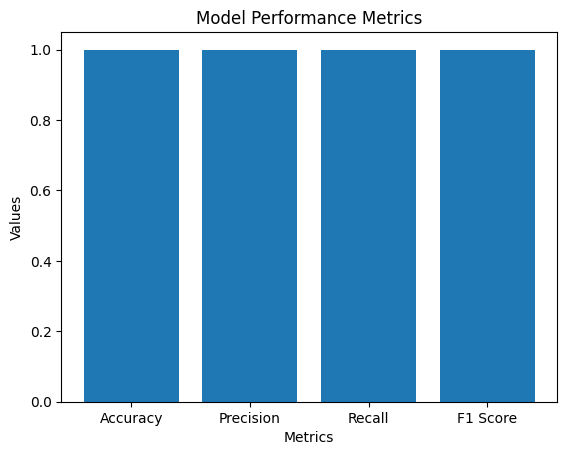

In [47]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Create a bar plot
plt.bar(metrics, values)

# Set the plot title and axis labels
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show the plot
plt.show()


### KNN

In [ ]:
# Determine the optimal value of k
best_k = 0
best_accuracy = 0
for k in range(1, 3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"a-> {accuracy} A -> {best_accuracy}" )
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best k: {}".format(best_k))

a-> 0.9999169614535067 A -> 0


In [48]:
# Train the model with the optimal value of k
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

# Predict the attack categories for the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using accuracy, precision, recall, and F1 score metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


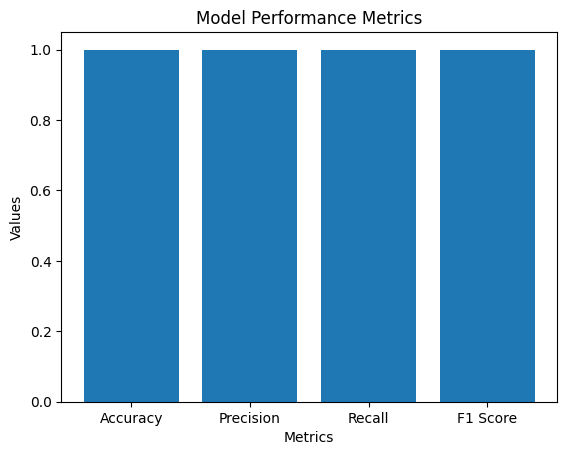

In [49]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Create a bar plot
plt.bar(metrics, values)

# Set the plot title and axis labels
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show the plot
plt.show()

### MLP

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(dataset['attack_category_x'])
y = y.reshape(-1, 1)
onehot_enc = OneHotEncoder()
y = onehot_enc.fit_transform(y).toarray()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(["attack_category_x", "attack_category_y", "attack_type"], axis=1), y, test_size=0.2, random_state=42)

# Define the model architecture
n_classes = len(le.classes_)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')   

# Print the evaluation metrics and classification report
print('Accuracy: %.2f%%' % (accuracy*100))
print('Precision: %.2f%%' % (precision*100))
print('Recall: %.2f%%' % (recall*100))
print('F1-score: %.2f%%' % (f1*100))



Epoch 1/10
13390/13390 [==============================] - 33s 2ms/step - loss: 3962.6267 - accuracy: 0.9156 - val_loss: 13003.8545 - val_accuracy: 0.9471
Epoch 2/10
13390/13390 [==============================] - 32s 2ms/step - loss: 5459.0757 - accuracy: 0.9319 - val_loss: 12744.2051 - val_accuracy: 0.9316
Epoch 3/10
13390/13390 [==============================] - 32s 2ms/step - loss: 7778.9341 - accuracy: 0.9395 - val_loss: 27338.1348 - val_accuracy: 0.9690
Epoch 4/10
13390/13390 [==============================] - 30s 2ms/step - loss: 18319.8809 - accuracy: 0.9446 - val_loss: 10006.3467 - val_accuracy: 0.9535
Epoch 5/10
13390/13390 [==============================] - 31s 2ms/step - loss: 21531.5801 - accuracy: 0.9367 - val_loss: 18183.1094 - val_accuracy: 0.9474
Epoch 6/10
13390/13390 [==============================] - 30s 2ms/step - loss: 21672.4590 - accuracy: 0.9442 - val_loss: 13797.4873 - val_accuracy: 0.9666
Epoch 7/10
13390/13390 [==============================] - 39s 3ms/step - 

/home/hami/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
